<div style="direction:rtl; text-align:right">

# Anticipating house rents?

<div style="direction:rtl; text-align:right">
First, we'll bring in the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<div style="direction:rtl; text-align:right">

# read data

<div style="direction:rtl; text-align:right">
After we have downloaded the data from the Cagle website, here we are going to read the data. And notice that we have training data and test data. Here we will combine the data together (isolating the price of the house, the variable whose value we have to predict later).

In [2]:
train_data = pd.read_csv('train.csv')

In [3]:
train_ids = train_data['Id']

In [4]:
test_data = pd.read_csv('test.csv')

In [5]:
test_ids = test_data['Id']

<div style="direction:rtl; text-align:right">
Here we isolate the house price variable.. and then we will delete it from the training data.

In [6]:
y = train_data['SalePrice']

In [7]:
train_data.drop(columns='SalePrice', inplace=True)

In [8]:
train_data.set_index('Id', inplace=True)

In [9]:
test_data.set_index('Id', inplace=True)

<div style="direction:rtl; text-align:right">
Finally we will merge the two tables using the concat command:

In [10]:
data = pd.concat([train_data, test_data], axis=0)

In [11]:
data.shape

(2919, 79)

In [12]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


<div style="direction:rtl; text-align:right">
In this data, we have a huge number of prediction variables. And we're going to spend this project looking at this data, refining it, and then creating a home price prediction model.

<div style="direction:rtl; text-align:right">

# Data processing

<div style="direction:rtl; text-align:right">First, let's find out about variables and their types. You can return to the data description file to read the description of each variable.

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

<div style="direction:rtl; text-align:right">It seems that we have a mixture between numeric variables (int64 or float64) and categorical variables (object). We also have many missing data. In general, it is not recommended to get rid of the lost data because the loss of the data itself may be a contributing factor in predicting the house price.

<div style="direction:rtl; text-align:right">To find out the sum of the missing digits in each variable, we will use the following command:

In [14]:
data.isnull().sum()

MSSubClass         0
MSZoning           4
LotFrontage      486
LotArea            0
Street             0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 79, dtype: int64

<div style="direction:rtl; text-align:right">
Due to the presence of a large number of variables, we note that the previous command did not print all the variables. We also notice that there are a lot of variables for which there is no missing data. In the following command, we will print the variables and the number of missing digits only if they have missing digits:

In [15]:
missing_data = data.isnull().sum()

In [16]:
for k, v in missing_data.items():
    if v>0 : 
        print(k,':\t' , v)

MSZoning :	 4
LotFrontage :	 486
Alley :	 2721
Utilities :	 2
Exterior1st :	 1
Exterior2nd :	 1
MasVnrType :	 24
MasVnrArea :	 23
BsmtQual :	 81
BsmtCond :	 82
BsmtExposure :	 82
BsmtFinType1 :	 79
BsmtFinSF1 :	 1
BsmtFinType2 :	 80
BsmtFinSF2 :	 1
BsmtUnfSF :	 1
TotalBsmtSF :	 1
Electrical :	 1
BsmtFullBath :	 2
BsmtHalfBath :	 2
KitchenQual :	 1
Functional :	 2
FireplaceQu :	 1420
GarageType :	 157
GarageYrBlt :	 159
GarageFinish :	 159
GarageCars :	 1
GarageArea :	 1
GarageQual :	 159
GarageCond :	 159
PoolQC :	 2909
Fence :	 2348
MiscFeature :	 2814
SaleType :	 1


<div style="direction:rtl; text-align:right">We find that some variables have very few missing values while others have very many values. We also see that some values are repeated, such as 159 and 82, or very close to each other. These observations are very important to take into account until we decide whether to keep them or delete them? Perhaps these variants come from a specific region or have specific characteristics. But we won't go into any of these details now.

<div style="direction:rtl; text-align:right">Now we want to extract two lists of columns: the first list contains the categorical_cols and the other list contains the numeric columns. Extract the columns in the following fields:

In [17]:



categorical_cols = data.select_dtypes(include=['object']).columns
numerical_cols = data._get_numeric_data().columns
categorical_cols

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [18]:
assert len(categorical_cols) == 43, 'Wrong number of categorical columns'
assert len(numerical_cols) == 36, 'Wrong number of neumerical columns'
print('OK! You may proceed.')

OK! You may proceed.


<div style="direction:rtl; text-align:right">We will start by preparing the categorical columns, we need to deal with the null values in the categorical columns, we need a function that will give us the names of the categorical columns that contain the null values, modify the below function to give us a list of these names

In [19]:



categorical_null =data[categorical_cols].loc[:, data[categorical_cols].isna().any()].columns
categorical_null 

Index(['MSZoning', 'Alley', 'Utilities', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PoolQC', 'Fence', 'MiscFeature', 'SaleType'],
      dtype='object')

In [20]:
assert len(categorical_null) == 23, 'Wrong number of null categorical columns'
print('OK! You may proceed.')

OK! You may proceed.


<div style="direction:rtl; text-align:right">We will divide the categorical columns with empty values into two parts: a section for deletion and a section for editing We will delete the columns that contain empty values in more than half of them and we will replace the empty values in the rest of the columns We will extract the names of the columns that should be deleted (empty values in them are more than half) and the columns that must be replaced empty values in it (empty values in it less than or equal to half)

In [21]:
to_remove = []  # Columns that should be deleted
to_fillna = []  # Columns in which null values should be replaced

for col in categorical_null:
    
    if len(data) - data[col].isna().sum() < len(data) / 2:
        to_remove.append(col)
    else:
        to_fillna.append(col)

In [22]:
assert len(to_remove) == 4, 'Wrong number of categorical columns'
assert len(to_fillna) == 19, 'Wrong number of categorical columns'
print('OK! You may proceed.')

OK! You may proceed.


<div style="direction:rtl; text-align:right">After we have extracted the columns, first delete the columns that need to be deleted (to_remove)

In [23]:
to_remove

['Alley', 'PoolQC', 'Fence', 'MiscFeature']

In [24]:

#data= data.drop(data[to_remove], axis=1)
#data.drop(columns=[data[categorical_null][to_remove]] , inplace=True)
data = data.drop(columns=to_remove)



<div style="direction:rtl; text-align:right">Now update the list of categorical variables (it should not contain the columns you deleted)

In [25]:

categorical_cols=data.select_dtypes(include=['object']).columns


In [26]:
assert len(categorical_cols) == 39, 'Wrong number of categorical columns'
print('OK! You may proceed.')

OK! You may proceed.


<div style="direction:rtl; text-align:right">For columns in the to_fillna variable, fill in the blank values with the most frequent value in each column or replace it with a distinct value for each column

In [27]:


#data[categorical_cols]=data[categorical_cols].fillna(data[categorical_cols].mode())
data[to_fillna]
data[to_fillna].isna().sum()


MSZoning           4
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinType2      80
Electrical         1
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageFinish     159
GarageQual       159
GarageCond       159
SaleType           1
dtype: int64

In [28]:
for column in to_fillna:
    data[column]= data[column].fillna(data[column].mode()[0])

<div style="direction:rtl; text-align:right">We will first deal with categorical variables. For categorical variables, we'll convert them to multiple numeric columns (1 or 0 for each column) just as we did in the first project using the pd.get_dummies command. But this time you will type it inside the command below

<div style="direction:rtl; text-align:right">Now we will use the previous code but inside a for loop to make the process easier. Complete the code below but don't forget to use the drop command to delete the original column.

In [29]:


def convert_categorical_to_dummies(df):
    # HINT: you use `categorical_cols` here
    # also: you should set dummy_na to TRUE (this is new)
    # extract dummy variables first (use dummy_na= True) to keep missing data marked
    # then add them to the end of original `df`
    # then drop the original variable from df (use inplace=True)

   # to_dummies_cols=['Dependents' , 'Property_Area'  ]

    for column in (data[categorical_cols].columns):
        df=pd.concat([df,pd.get_dummies(df[column], prefix=column)],axis=1)
        df.drop(column, axis=1, inplace=True)
    
    
    return df

<div style="direction:rtl; text-align:right">
Here we'll use the command we created above:

In [30]:
data = convert_categorical_to_dummies(data)

In [31]:
data.shape

(2919, 275)

In [33]:
#assert data.shape[1] == 333 or data.shape[1] == 314, 'Wrong shape.'
#print('Ok! You may proceed!')

In [34]:
data.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=275)

<div style="direction:rtl; text-align:right">
We can use the describe command to describe numeric columns:

In [35]:
data[numerical_cols].describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,...,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,...,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737
std,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,...,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,...,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,...,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,...,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,...,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


<div style="direction:rtl; text-align:right">We want to query how many numeric variables have missing values in order to process them. In the next column, we will print the names of the numerical columns with missing values (using numerical_cols). Can you complete the task? You should write the program in the below command.

In [36]:


numerical_cols_w_nans = data[numerical_cols].loc[:, data[numerical_cols].isna().any()].columns

numerical_cols_w_nans

Index(['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt',
       'GarageCars', 'GarageArea'],
      dtype='object')

<div style="direction:rtl; text-align:right">
After examining the missing data, we found that a number of numeric columns had missing data. The question now is how do we deal with the missing data?

In [37]:
assert len(numerical_cols_w_nans)==11, 'Numerical Columns with NaNs are in the wrong shape!'

<div style="direction:rtl; text-align:right">Let's first examine the column distribution for each of these variables using the following example:

<AxesSubplot:ylabel='Frequency'>

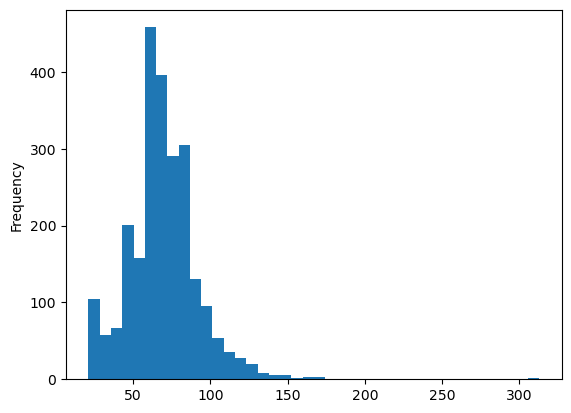

In [38]:
data['LotFrontage'].plot.hist(bins=40)

<div style="direction:rtl; text-align:right">In LotFrontage, the data follows a normal distribution except for some very high values on the far right (after 300). Thus, replacing the missing data with Median may seem a suitable option. Note that this variable is the one with the most missing values..

In [39]:
data['LotFrontage']= data['LotFrontage'].fillna(data['LotFrontage'].median())


<AxesSubplot:ylabel='Frequency'>

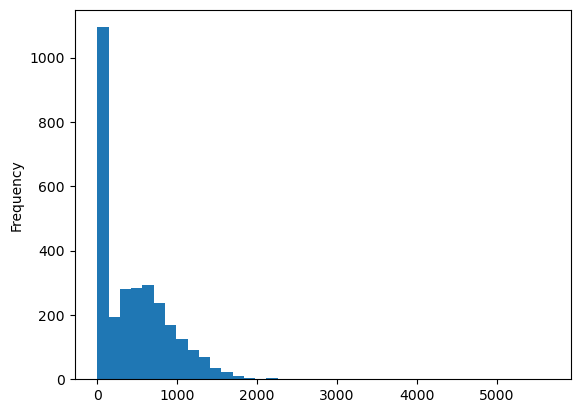

In [40]:
data['BsmtFinSF1'].plot.hist(bins=40)

<div style="direction:rtl; text-align:right">We find that a large number of data has a value of 0 while the rest of the values decrease as the space increases. Here we can substitute a unique value for the missing values let it be -1.

In [41]:
data['BsmtFinSF1']= data['BsmtFinSF1'].fillna(-1)


<AxesSubplot:ylabel='Frequency'>

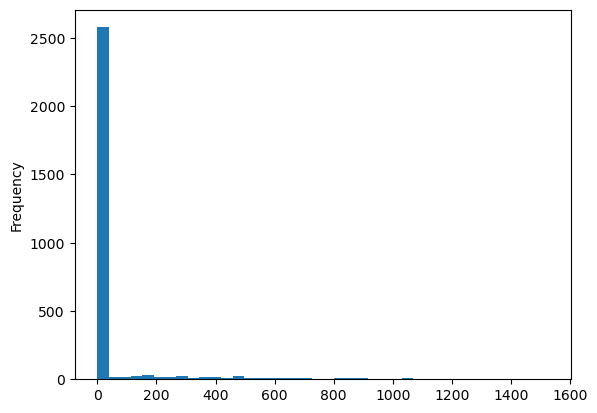

In [42]:
data['BsmtFinSF2'].plot.hist(bins=40)


<div style="direction:rtl; text-align:right">We find that a large number of data has a value of 0 while the rest of the values are barely visible. Here we can substitute -1

In [43]:
data['BsmtFinSF2']= data['BsmtFinSF2'].fillna(-1)


<AxesSubplot:ylabel='Frequency'>

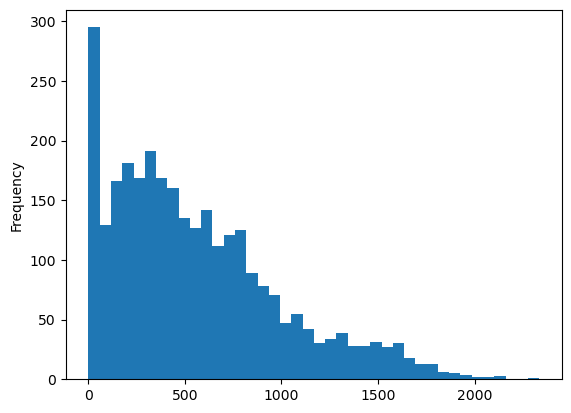

In [44]:
data['BsmtUnfSF'].plot.hist(bins=40)


<div style="direction:rtl; text-align:right">Here we find a similar and recurring pattern, which is that most of the data is distributed around the value of 0, but the rest of the values decrease after that with the increase in the area. Here we'll substitute with -1.

In [45]:
data['BsmtUnfSF']= data['BsmtUnfSF'].fillna(-1)


<AxesSubplot:ylabel='Frequency'>

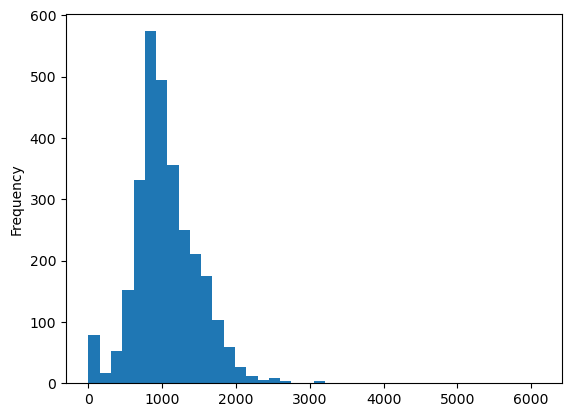

In [46]:
data['TotalBsmtSF'].plot.hist(bins=40)

<div style="direction:rtl; text-align:right">Here we can see a clear normal distribution which means we can use the arithmetic mean.

In [47]:
data['TotalBsmtSF']= data['TotalBsmtSF'].fillna(data['TotalBsmtSF'].mean())


<AxesSubplot:ylabel='Frequency'>

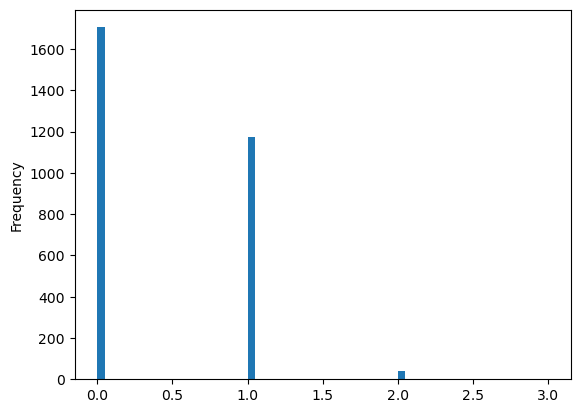

In [48]:
data['BsmtFullBath'].plot.hist(bins=60)

<div style="direction:rtl; text-align:right">This variable measures the number of (complete) toilets on the ground floor and as we can see the values are around 0, 1 and 2. We'll use -1 to compensate for the missing values here..

In [49]:
data['BsmtFullBath']= data['BsmtFullBath'].fillna(-1)


<AxesSubplot:ylabel='Frequency'>

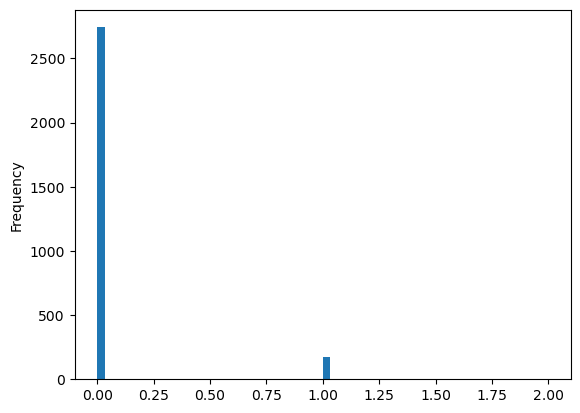

In [50]:
data['BsmtHalfBath'].plot.hist(bins=60)


<div style="direction:rtl; text-align:right">This variable measures the number of toilets (including toilet only) on the ground floor and as we can see the values are around 0, 1 and 2. We will use -1 to compensate for the missing values here..

In [51]:
data['BsmtHalfBath']= data['BsmtHalfBath'].fillna(-1)


<AxesSubplot:ylabel='Frequency'>

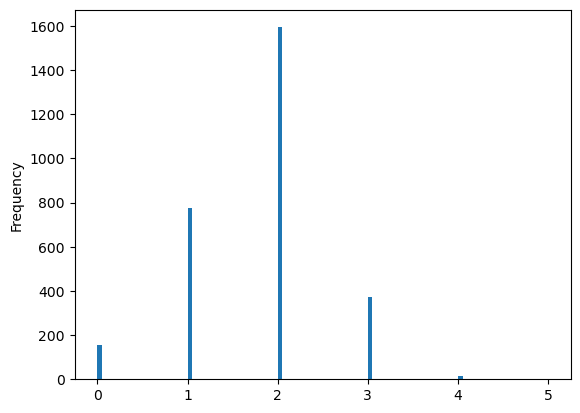

In [52]:
data['GarageCars'].plot.hist(bins=100) #40

<div style="direction:rtl; text-align:right">The number of cars in the garage, so obviously we're going to use -1 to make up for the missing values here..

In [53]:
data['GarageCars']= data['GarageCars'].fillna(-1)


<AxesSubplot:ylabel='Frequency'>

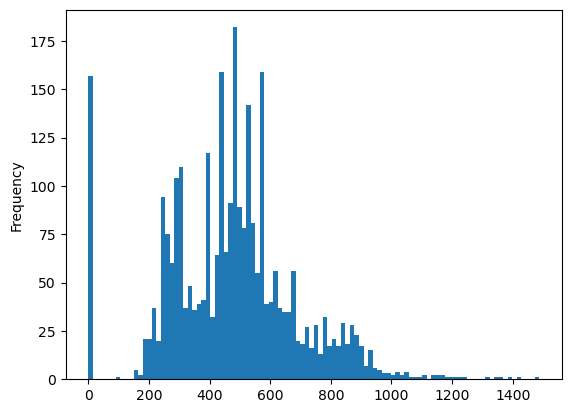

In [54]:
data['GarageArea'].plot.hist(bins=100) #40

<div style="direction:rtl; text-align:right">Garage area follows an almost normal distribution. In fact, it is difficult to prefer one option over another, but the value of -1 for the missing digit in this variable seems to be a safer option.

In [55]:
data['GarageArea']= data['GarageArea'].fillna(-1)


<AxesSubplot:ylabel='Frequency'>

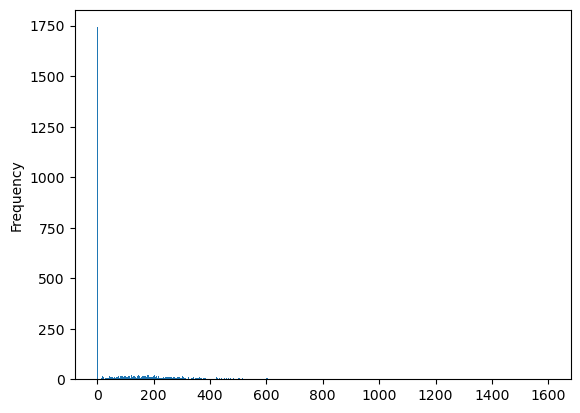

In [56]:
data['MasVnrArea'].plot.hist(bins=400)

<div style="direction:rtl; text-align:right">This variable has only 8 missing values, but the number distribution is completely different as most of the values are 0. What do we do with the missing values? Substituting by mean or median is meaningless in this case. Here we either set the missing value as 0 or choose a unique value that represents the missing values to contribute to the model's predictions, such as -1 (as we explained in the lesson).).

In [57]:
data['MasVnrArea']= data['MasVnrArea'].fillna(-1)


<AxesSubplot:ylabel='Frequency'>

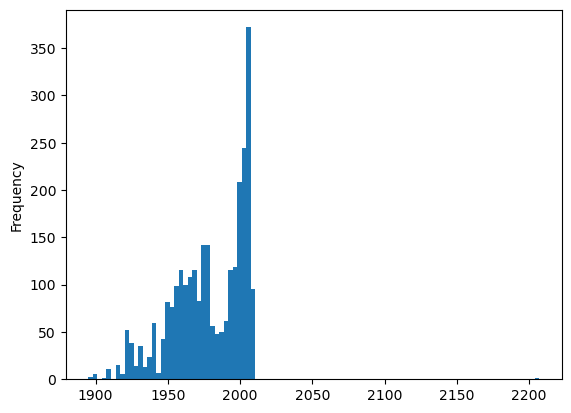

In [58]:
data['GarageYrBlt'].plot.hist(bins=100) #40

<div style="direction:rtl; text-align:right">The GarageYrBlt variable has 81 missing values. Looking at the distribution of years, we find that we have a slightly zigzag distribution, and here it is difficult to use the average or median. We have no choice but to choose a unique value that expresses the missing values, let it be -1.

In [59]:
data['GarageYrBlt']= data['GarageYrBlt'].fillna(-1)


<div style="direction:rtl; text-align:right">Based on the suggestions above, now it's your turn to replace the missing values with the new ones.

In [60]:
assert (data==-1).sum().sum() == 191, 'Did you fill in missing values the right way ?'

In [61]:
assert data.isnull().sum().sum() == 0, 'There are still NaNs! Task is not completed.'

<div style="direction:rtl; text-align:right">After dealing with the missing values, it might be appropriate to consider whether or not we want to normalize the data. In fact, the data reconciliation may not mean anything because all the areas according to the description are measured in the same units, which are square feet. But if we are in a scenario where we find that the areas follow different units, then in this case we need to normalize the data before subjecting it to any analysis..

<div style="direction:rtl; text-align:right">

# Data modeling

<div style="direction:rtl; text-align:right">
We will now create a home price prediction model from the existing data. This time we will use random forests. Ts:

- https://www.syr-res.com/article/11885.html

In [62]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

<div style="direction:rtl; text-align:right">
The fastest way to know the performance of the model is by using the cross_val_score command, where this command divides the data into training data and select data using cross validation and then performs the modeling without any need for intervention. Next, we'll print the "score" average to find out more generally about the average performance of the model before applying it to new data. We'll use the correlation square (R^2) to check the pattern.

<div style="direction:rtl; text-align:right">But before we implement cross validation, we will first isolate the training data, and then we will isolate the response variable from the prediction variables and save the data in two variables: x and y.

In [63]:
train_data = data.loc[train_ids] # this is X
test_data  = data.loc[test_ids]  # this is test data

In [64]:
rf_model = RandomForestRegressor(n_estimators=50)
scores_RF = cross_val_score(rf_model, train_data, y, cv=5, scoring='r2')

In [65]:
scores_RF.mean()

0.8504976389651666

- https://scikit-learn.org/stable/modules/ensemble.html#forest

In [66]:
rf_model.fit(train_data, y) # training model on full data

RandomForestRegressor(n_estimators=50)

In [67]:
test_data['SalePrice'] = rf_model.predict(test_data)

In [68]:
test_data['SalePrice'].to_csv('./house_predictions_submission.csv', header=True)